In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

## Day 31 Lecture 1 Assignment

In this assignment, we will learn about the K nearest neighbor algorithm. We will use the titanic dataset and create a model that can predict if a passenger will survive the Titanic Shipwreck or not {0, 1}.

In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

<IPython.core.display.Javascript object>

Columns:
- 'PassengerId': id of the passenger
- 'Survived': 
- 'Pclass': Ticket class
- 'Name': Name
- 'Sex': sex
- 'Age': Age in years
- 'SibSp': # of siblings / spouses aboard the Titanic
- 'Parch': # of parents / children aboard the Titanic
- 'Ticket': 
- 'Fare': Passenger fare
- 'Cabin': Cabin number
- 'Embarked': Port of Embarkation

In [3]:
data = pd.read_csv(
    "https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/titanic.csv"
)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<IPython.core.display.Javascript object>

In [4]:
data.shape

(891, 12)

<IPython.core.display.Javascript object>

We check the distribution of variables for the column we want to predict.

In [5]:
data["Survived"].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

<IPython.core.display.Javascript object>

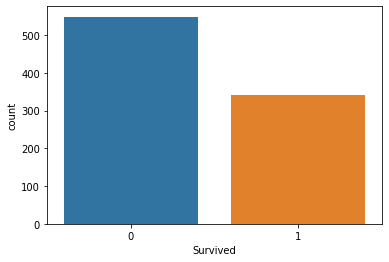

<IPython.core.display.Javascript object>

In [6]:
sns.countplot(data["Survived"])
plt.show()

First, check for missing data and remove all columns containing missing data

In [7]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<IPython.core.display.Javascript object>

In [8]:
data = data.dropna(axis="columns")

<IPython.core.display.Javascript object>

We also drop columns that are not informative and contain too many unique values(e.g. name)

In [9]:
# Calculate unique values for each column
for c in data.select_dtypes("O"):
    print(f"{c} has {data[c].nunique()} unique values")

Name has 891 unique values
Sex has 2 unique values
Ticket has 681 unique values


<IPython.core.display.Javascript object>

In [10]:
# Drop columns 'PassengerId', 'Name' and 'Ticket'.
data = data.drop(columns=["PassengerId", "Name", "Ticket"])

<IPython.core.display.Javascript object>

To use the data, we must convert all columns to numeric. Do this by replacing yes and no with 1 and 0.

In [11]:
data["is_female"] = data["Sex"] == "female"
data["is_female"] = data["is_female"].astype(int)

data = data.drop(columns="Sex")
data.head()

,Survived,Pclass,SibSp,Parch,Fare,is_female
0,0,3,1,0,7.2500,0
1,1,1,1,0,71.2833,1
2,1,3,0,0,7.9250,1
3,1,1,1,0,53.1000,1
4,0,3,0,0,8.0500,0


<IPython.core.display.Javascript object>

Split the data into train and test. Use 20% of the data for our test subset. We will use the train_test_split function from scikit-learn for this.

In [12]:
X = data.drop(columns="Survived")
y = data["Survived"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

<IPython.core.display.Javascript object>

Generate a KNN model with k=1 for the dataset. What is the accuracy score for the train and test subsamples?

In [13]:
model = KNeighborsClassifier(1)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

<IPython.core.display.Javascript object>

In [14]:
model.score(X_train, y_train)

0.8876404494382022

<IPython.core.display.Javascript object>

In [15]:
model.score(X_test, y_test)

0.7318435754189944

<IPython.core.display.Javascript object>

Would you say the model overfits? Why or why not? Put your answer in the comment below.

In [16]:
# yes, in general, 1 observation driving a prediction sounds risky
# we also have a gap of almost 20% between train and test scores

<IPython.core.display.Javascript object>

Let's optimize k. A good idea is to create plots that depict train and test accuracy for each candidate k. Since we have 2 classes, we will be selecting odd numbers in order to deal with possible ties. By selecting a really small k, e.g. k=1, we increase variance and the model is prone to overfitting since it will only take into account the nearest neighbor where there could be a lot of other close samples belonging to another class. By doing the opposite, selecting a big k we are prone to underfitting, as we increase bias as there is a higher probability to select the majority class.


In [17]:
train_scores = []
test_scores = []
train_f1s = []
test_f1s = []
ks = range(1, 15, 2)

<IPython.core.display.Javascript object>

For each k value in the list created above we want to create and fit a knn instance on X_train, y_train and then make predictions both on the training set (X_train) as well as on the test set(X_test) and calculate accuracy and f1 score and append it to the corrensponding list.

In [18]:
for k in ks:
    model = KNeighborsClassifier(k)
    model.fit(X_train, y_train)

    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    train_f1 = f1_score(y_train, model.predict(X_train))
    test_f1 = f1_score(y_test, model.predict(X_test))

    train_scores.append(train_score)
    test_scores.append(test_score)
    train_f1s.append(train_f1)
    test_f1s.append(test_f1)

<IPython.core.display.Javascript object>

In the following plot we want to select the k that achieves the highest test score. 

Create a two plots with each of them depicting the following information:
1. Two lines, one for training accuracy and one for test accuracy for each k value.
2. Two lines, one for training F1score and one for test F1 score for each k value.

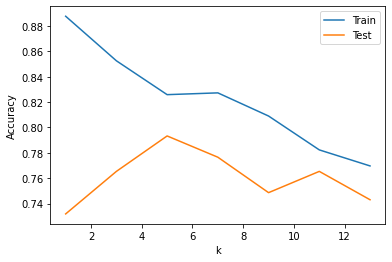

<IPython.core.display.Javascript object>

In [19]:
plt.plot(ks, train_scores, label="Train")
plt.plot(ks, test_scores, label="Test")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

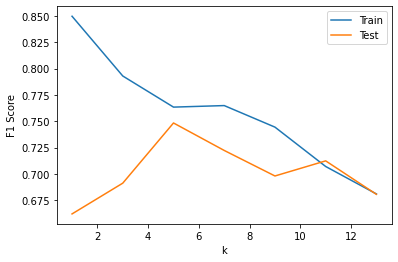

<IPython.core.display.Javascript object>

In [20]:
plt.plot(ks, train_f1s, label="Train")
plt.plot(ks, test_f1s, label="Test")
plt.xlabel("k")
plt.ylabel("F1 Score")
plt.legend()
plt.show()

Please comment the results of the plots above

In [21]:
# k = 5 appears to perform the best on the test set
# Before 5 we see large gaps between train and test indicating our model is overfitting
# After 5 we see a drop of in scores indicating our model is underfitting

<IPython.core.display.Javascript object>